In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [2]:
stock = pd.read_csv('AAPL.csv')

In [3]:
stock.info() # date is a string

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10791 entries, 0 to 10790
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            10791 non-null  object 
 1   Open            10791 non-null  float64
 2   High            10791 non-null  float64
 3   Low             10791 non-null  float64
 4   Close           10791 non-null  float64
 5   Day Difference  10791 non-null  float64
 6   Adj Close       10791 non-null  float64
 7   Volume          10791 non-null  float64
dtypes: float64(7), object(1)
memory usage: 674.6+ KB


In [4]:
stock['Date'] = pd.to_datetime(stock['Date'], format = '%d-%m-%Y') #convert date to datetime

In [5]:
stock

,Date,Open,High,Low,Close,Day Difference,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.00000,0.099450,469033600.0
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,-0.00056,0.094261,175884800.0
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,-0.00056,0.087343,105728000.0
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.00000,0.089504,86441600.0
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.00000,0.092099,73449600.0
...,...,...,...,...,...,...,...,...
10786,2023-09-26,174.820007,175.199997,171.660004,171.960007,-2.86000,171.960007,64588900.0
10787,2023-09-27,172.619995,173.039993,169.050003,170.429993,-2.19000,170.429993,66921800.0
10788,2023-09-28,169.339996,172.029999,167.619995,170.690002,1.35001,170.690002,56294400.0
10789,2023-09-29,172.020004,173.070007,170.339996,171.210007,-0.81000,171.210007,51814200.0


In [6]:
stock['Year'] = stock['Date'].dt.year # get the year from date column and create a new year column

In [7]:
stock['Year'] = pd.to_numeric(stock['Year'], downcast = 'integer') # convert year to integer

In [8]:
stock = stock.drop(columns = 'Date') #drop the date column

stock.to_csv('new_APPL.csv', index = False)

In [9]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10791 entries, 0 to 10790
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Open            10791 non-null  float64
 1   High            10791 non-null  float64
 2   Low             10791 non-null  float64
 3   Close           10791 non-null  float64
 4   Day Difference  10791 non-null  float64
 5   Adj Close       10791 non-null  float64
 6   Volume          10791 non-null  float64
 7   Year            10791 non-null  int16  
dtypes: float64(7), int16(1)
memory usage: 611.3 KB


In [10]:
stock = pd.read_csv('new_APPL.csv')

In [11]:
stock

,Open,High,Low,Close,Day Difference,Adj Close,Volume,Year
0,0.128348,0.128906,0.128348,0.128348,0.00000,0.099450,469033600.0,1980
1,0.122210,0.122210,0.121652,0.121652,-0.00056,0.094261,175884800.0,1980
2,0.113281,0.113281,0.112723,0.112723,-0.00056,0.087343,105728000.0,1980
3,0.115513,0.116071,0.115513,0.115513,0.00000,0.089504,86441600.0,1980
4,0.118862,0.119420,0.118862,0.118862,0.00000,0.092099,73449600.0,1980
...,...,...,...,...,...,...,...,...
10786,174.820007,175.199997,171.660004,171.960007,-2.86000,171.960007,64588900.0,2023
10787,172.619995,173.039993,169.050003,170.429993,-2.19000,170.429993,66921800.0,2023
10788,169.339996,172.029999,167.619995,170.690002,1.35001,170.690002,56294400.0,2023
10789,172.020004,173.070007,170.339996,171.210007,-0.81000,171.210007,51814200.0,2023


In [12]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10791 entries, 0 to 10790
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Open            10791 non-null  float64
 1   High            10791 non-null  float64
 2   Low             10791 non-null  float64
 3   Close           10791 non-null  float64
 4   Day Difference  10791 non-null  float64
 5   Adj Close       10791 non-null  float64
 6   Volume          10791 non-null  float64
 7   Year            10791 non-null  int64  
dtypes: float64(7), int64(1)
memory usage: 674.6 KB


**1) Heatmap**

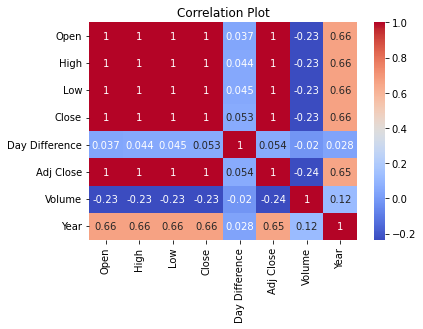

In [13]:
sns.heatmap(stock.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Plot')
plt.show()

In [14]:
stock.columns

Index(['Open', 'High', 'Low', 'Close', 'Day Difference', 'Adj Close', 'Volume',
       'Year'],
      dtype='object')

In [15]:
stock.shape

(10791, 8)

In [16]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10791 entries, 0 to 10790
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Open            10791 non-null  float64
 1   High            10791 non-null  float64
 2   Low             10791 non-null  float64
 3   Close           10791 non-null  float64
 4   Day Difference  10791 non-null  float64
 5   Adj Close       10791 non-null  float64
 6   Volume          10791 non-null  float64
 7   Year            10791 non-null  int64  
dtypes: float64(7), int64(1)
memory usage: 674.6 KB


In [17]:
stock.isnull().sum() # tells you the num of null values per column

Open              0
High              0
Low               0
Close             0
Day Difference    0
Adj Close         0
Volume            0
Year              0
dtype: int64

In [18]:
stock['Day Difference'].value_counts()

 0.00000    727
-0.00223    276
-0.00056    272
 0.00223    254
-0.00112    226
           ... 
-0.63250      1
 0.11071      1
-0.19071      1
 0.32893      1
-0.81000      1
Name: Day Difference, Length: 2645, dtype: int64

**2) Time Series**

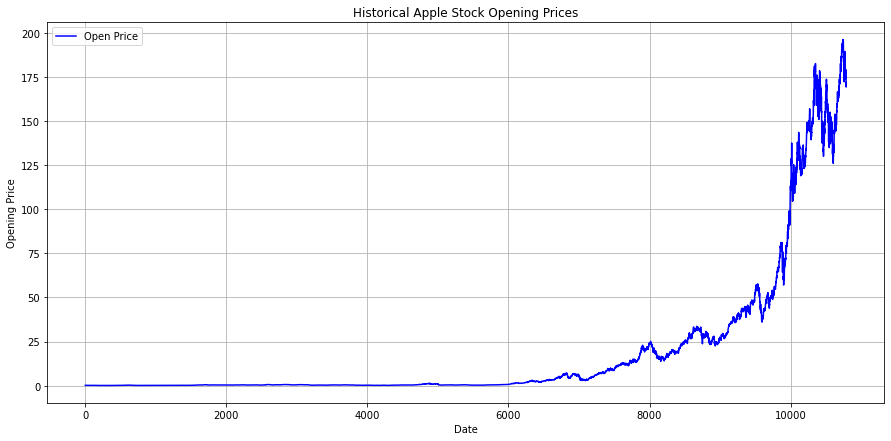

In [19]:
plt.figure(figsize=(15, 7))
sns.lineplot(x=stock.index, y=stock['Open'], label='Open Price', color='blue')
plt.title('Historical Apple Stock Opening Prices')
plt.xlabel('Date')
plt.ylabel('Opening Price')
plt.legend()
plt.grid(True)
plt.show()

**3) Barplot**

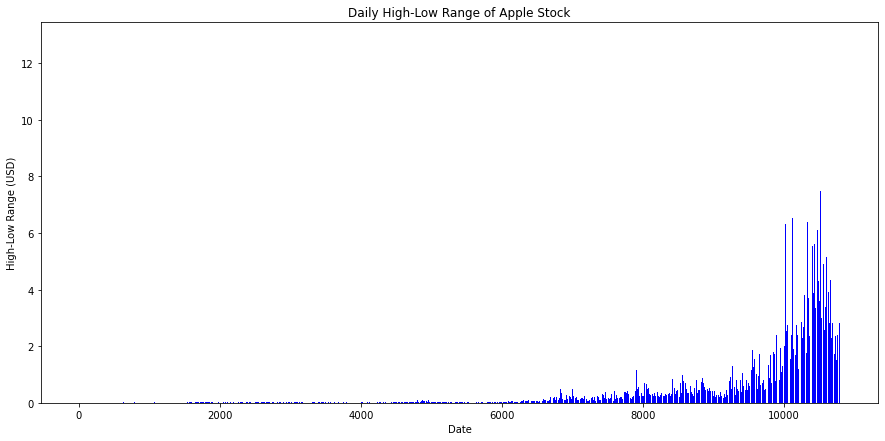

In [20]:
plt.figure(figsize=(15, 7))
plt.bar(stock.index, stock['High'] - stock['Low'], color='blue')
plt.title('Daily High-Low Range of Apple Stock')
plt.xlabel('Date')
plt.ylabel('High-Low Range (USD)')
plt.show()


**4) KDE Plot**

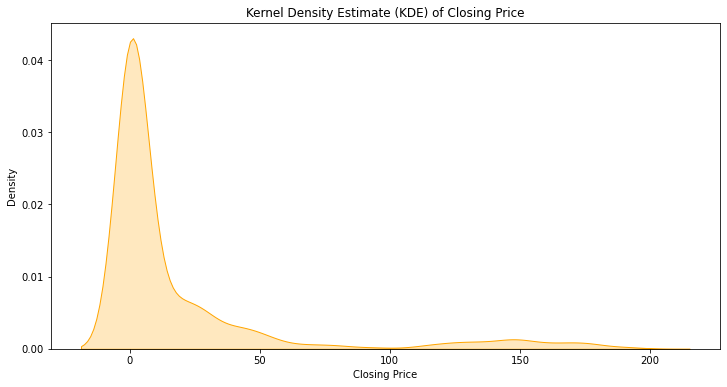

In [21]:
plt.figure(figsize=(12, 6))
sns.kdeplot(stock['Close'], fill=True, color='orange')
plt.title('Kernel Density Estimate (KDE) of Closing Price')
plt.xlabel('Closing Price')
plt.ylabel('Density')
plt.show()

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [23]:
X = stock[['Open', 'High', 'Low', 'Volume', 'Year']]
y = stock['Close']

# Splitting the dataset into 0.7 training and 0.3 test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state=2)

In [24]:
LR = LinearRegression() # create linear regression model

LR.fit(X_train, y_train) # train model

LinearRegression()

In [25]:
y_predict = LR.predict(X_test) # make predictions on the test set

In [26]:
coefficients = LR.coef_
print(f'Coefficients {coefficients}')

Coefficients [-6.84067995e-01  8.33169331e-01  8.50978080e-01 -2.62012634e-13
  4.72820396e-04]


In [27]:
intercept = LR.intercept_
print(f'Intercept: {intercept}')

Intercept: -0.9413317950647553


In [28]:
# see actual vs predictions
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict})

In [29]:
df.head(20) # see first 20

,Actual,Predicted
3667,0.389509,0.390491
2417,0.399554,0.397209
4364,0.238839,0.241386
8627,32.115002,32.258216
7338,7.523214,7.409872
7923,20.327856,20.362874
7391,8.392857,8.421972
460,0.104911,0.099424
3454,0.306362,0.310881
2279,0.310268,0.309689


In [30]:
r2 = r2_score(y_test, y_predict) # accuracy score
print(f'R-Squared: {r2}') 

R-Squared: 0.999943868177901


In [31]:
mse = mean_squared_error(y_test, y_predict)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.0983650851728614


In [32]:
rmse = mean_squared_error(y_test, y_predict, squared=False) # squared is set to False to return rmse instead of mse
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 0.3136320856877711


In [33]:
mae = mean_absolute_error(y_test, y_predict)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 0.09691656008644736


In [34]:
# export the model as pickle
import pickle

with open('apple_prediction_model.pkl', 'wb') as f:
    pickle.dump(LR, f)